# Extension version

ideas:
* full plot of 20 MDS (probably not super important)
* similarity between elements that are supposed to correspond
    * take all elements in each category and find average pairwise similarities
* maybe groupings by explicit performance? 
* case studies: look at certain individuals' before and after MDS plots that are similar
* then say future analyses will involve more formal modeling/Bayesian regression to see if this itself is a viable set of implicit measures (are they the same before and after with no intervention) & can they be intervened on? what would this look like (lay out paradigm)
* analyses by SIMA rating? 
    * e.g. is SIMA related to explicit math ability vs. implicit?
    * control for college semesters and math_freq
* dendrograms

In [1]:
from representations import mds, plot_dendrogram
import csv
import numpy as np
%pylab inline
import pandas as pd
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
sim_data = pd.read_csv('./Data/Extension_1.18.18.csv', encoding = 'utf-8')
sim_data = sim_data[2:]

# eliminations due to technical difficulties
sim_data = sim_data[sim_data.random.astype(int) != 5089]
sim_data = sim_data[sim_data.random.astype(int) != 9502] # problems with explicit math survey only
sim_data = sim_data[sim_data.random.astype(int) != 6531] # problems with explicit math survey only



# attention check failing: __ people eliminated
sim_data = sim_data[sim_data.attcheck1_1.astype(int) > 90] # How similar do you believe 3 and 3 are?
sim_data = sim_data[sim_data.attcheck3_1.astype(int) > 90] # How similar do you believe 20 and 20 are?
sim_data = sim_data[sim_data.attcheck5_1.astype(int) > 90] # How similar do you believe 11 and 11 are?
sim_data = sim_data[sim_data.attcheck7_1.astype(int) > 90] # How similar do you believe 18 and 18 are?
sim_data = sim_data[sim_data.attcheck9_1.astype(int) > 90] # How similar do you believe 7 and 7 are?

# sim_data = sim_data[sim_data.attcheck2_1.astype(int) < 10] # How similar do you believe 153 and 2 are?
# sim_data = sim_data[sim_data.attcheck4_1.astype(int) < 10] # How similar do you believe 10 and 161 are?
# sim_data = sim_data[sim_data.attcheck6_1.astype(int) < 10] # How similar do you believe 4 and 157 are?
# sim_data = sim_data[sim_data.attcheck8_1.astype(int) < 10] # How similar do you believe 142 and 3 are?
# sim_data = sim_data[sim_data.attcheck10_1.astype(int) < 10] # How similar do you believe 101 and 5 are?

# 4 more eliminated for spending until 5 minutes
# sim_data = sim_data[sim_data['Duration (in seconds)'].astype(int) > 300]


sim_data

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,SC8,SC9,SC10,SC11,SC12,SC13,SC14,SC15,workerId,random
2,2017-12-27 10:18:34,2017-12-27 10:58:49,IP Address,75.187.144.207,100,2414,True,2017-12-27 10:58:49,R_1GZgzB4VHcpkE43,NaN,...,5,0,0,0,0,7,0,0,NaN,1815
3,2017-12-27 10:56:20,2017-12-27 11:22:06,IP Address,162.198.201.8,100,1545,True,2017-12-27 11:22:07,R_33s6U4gpqHxIcyk,NaN,...,0,0,0,0,0,0,0,0,NaN,8505
5,2017-12-27 10:42:05,2017-12-27 11:31:49,IP Address,50.125.89.159,100,2984,True,2017-12-27 11:31:50,R_2YCUdCNnEk2S86T,NaN,...,0,0,0,0,0,2,0,0,NaN,8311
6,2017-12-27 10:48:52,2017-12-27 12:08:08,IP Address,108.7.176.50,100,4755,True,2017-12-27 12:08:10,R_2OQ32zIfOL7pa94,NaN,...,0,0,0,0,0,1,0,0,NaN,7845
7,2017-12-27 12:23:14,2017-12-27 12:49:02,IP Address,47.34.215.213,100,1547,True,2017-12-27 12:49:03,R_2S00MJghvXHuzKB,NaN,...,0,0,0,0,0,0,0,0,NaN,2364
8,2017-12-27 13:46:10,2017-12-27 14:10:34,IP Address,73.84.80.57,100,1463,True,2017-12-27 14:10:34,R_2CD0Ze6f728T8NX,NaN,...,3,0,0,0,0,4,0,0,NaN,4588
9,2017-12-27 14:44:18,2017-12-27 15:26:24,IP Address,24.60.176.206,100,2525,True,2017-12-27 15:26:25,R_x3igMDglX54MenT,NaN,...,2,0,0,0,0,5,0,0,NaN,5344
10,2017-12-27 14:16:08,2017-12-27 15:27:59,IP Address,174.109.39.217,100,4310,True,2017-12-27 15:28:00,R_2ZKtBunwJNzYKs1,NaN,...,0,0,0,0,0,0,0,0,NaN,6336
11,2017-12-27 22:14:36,2017-12-27 22:43:38,IP Address,108.94.130.166,100,1741,True,2017-12-27 22:43:39,R_3069d9iRqvUgmqs,NaN,...,0,0,0,0,0,0,0,0,NaN,3196
12,2018-01-18 09:56:47,2018-01-18 10:09:30,IP Address,148.75.30.213,100,762,True,2018-01-18 10:09:32,R_2Y4DHBN0RVRYm4l,NaN,...,0,1,0,0,0,0,0,0,NaN,4734


(array([ 1.,  0.,  1.,  1.,  1.,  4.,  5.,  2.,  2., 10., 10.,  3.,  3.,
         9.]),
 array([ 500,  600,  700,  800,  900, 1000, 1100, 1200, 1300, 1400, 1500,
        1600, 1700, 1800, 2000]),
 <a list of 14 Patch objects>)

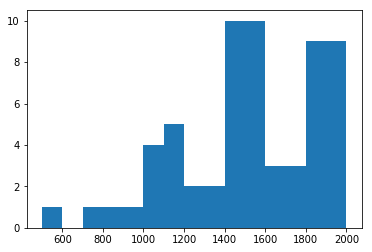

In [3]:
plt.hist(sim_data['Duration (in seconds)'].astype(int),bins=[500,600,700,800,900,1000,
                                                             1100,1200,1300,1400,1500,1600,1700,1800,2000])

## BASIC STATS

In [4]:
sim_data.age.astype(int).mean()

36.285714285714285

In [5]:
sim_data.gender.value_counts()

Male      50
Female    34
Name: gender, dtype: int64

In [6]:
sim_data.ethnicity.value_counts()

White                        69
Black or African American     6
Asian                         5
Hispanic or Latino            4
Name: ethnicity, dtype: int64

In [7]:
sim_data.college_semesters.value_counts()

5 or more    40
0            14
4            12
2             8
1             4
3             4
Name: college_semesters, dtype: int64

In [8]:
sim_data.profession.value_counts()

Other                                                         14
Sales and Related Occupations                                 12
Computer and Mathematical Occupations                         11
Office and Administrative Support Occupations                  8
Food Preparation and Serving Related Occupations               7
Education, Training, and Library Occupations                   6
Construction and Extraction Occupations                        5
Production Occupations                                         4
Arts, Design, Entertainment, Sports, and Media Occupations     3
Business and Financial Operations Occupations                  2
Transportation and Materials Moving Occupations                2
Management Occupations                                         2
Architecture and Engineering Occupations                       2
Installation, Maintenance, and Repair Occupations              2
Personal Care and Service Occupations                          1
Healthcare Support Occupa

In [9]:
sim_data.math_freq.value_counts() # How often do you use math in your current profession?

Weekly                   34
Daily                    32
Less than once a year    12
Hourly                    3
Yearly                    3
Name: math_freq, dtype: int64

## EXPLICIT MATH TASK

In [10]:
# how many correctly categorized
sim_data['primes'] = sim_data['SC0'].astype(int) # out of 6
sim_data['mult3'] = sim_data['SC1'].astype(int) # out of 6
sim_data['mult4'] = sim_data['SC2'].astype(int) # out of 6
sim_data['mult5'] = sim_data['SC3'].astype(int) # out of 4
sim_data['mult7'] = sim_data['SC4'].astype(int) # out of 4
sim_data['squares'] = sim_data['SC5'].astype(int) # out of 4
sim_data['even'] = sim_data['SC6'].astype(int) # out of 10
sim_data['odd'] = sim_data['SC7'].astype(int) # out of 10

# how many incorrectly categorized
sim_data['notPrime'] = sim_data['SC8'].astype(int)
sim_data['notMult3'] = sim_data['SC9'].astype(int)
sim_data['notMult4'] = sim_data['SC10'].astype(int)
sim_data['notMult5'] = sim_data['SC11'].astype(int)
sim_data['notMult7'] = sim_data['SC12'].astype(int)
sim_data['notSquare'] = sim_data['SC13'].astype(int)
sim_data['notEven'] = sim_data['SC14'].astype(int)
sim_data['notOdd'] = sim_data['SC15'].astype(int)

In [11]:
print("prime: ", sim_data['primes'].value_counts())
print("mult3: ", sim_data['mult3'].value_counts())
print("mult4: ", sim_data['mult4'].value_counts())
print("mult5: ", sim_data['mult5'].value_counts())
print("mult7: ", sim_data['mult7'].value_counts())
print("square: ", sim_data['squares'].value_counts())
print("even: ", sim_data['even'].value_counts())
print("odd: ", sim_data['odd'].value_counts())

prime:  6    56
5    14
0     7
4     4
1     2
2     1
Name: primes, dtype: int64
mult3:  6    63
5    15
3     3
4     2
2     1
Name: mult3, dtype: int64
mult4:  6    68
5    10
4     5
3     1
Name: mult4, dtype: int64
mult5:  4    75
3     7
2     2
Name: mult5, dtype: int64
mult7:  4    70
3    11
2     2
1     1
Name: mult7, dtype: int64
square:  4    47
2    14
1    10
3     9
0     4
Name: squares, dtype: int64
even:  10    81
9      3
Name: even, dtype: int64
odd:  10    74
9      5
8      3
4      1
1      1
Name: odd, dtype: int64


In [12]:
print("not prime: ", sim_data['notPrime'].value_counts())
print("not mult3: ", sim_data['notMult3'].value_counts())
print("not mult4: ", sim_data['notMult4'].value_counts())
print("not mult5: ", sim_data['notMult5'].value_counts())
print("not mult7: ", sim_data['notMult7'].value_counts())
print("not square: ", sim_data['notSquare'].value_counts())
print("not even: ", sim_data['notEven'].value_counts())
print("not odd: ", sim_data['notOdd'].value_counts())

not prime:  0     62
1     11
2      4
3      3
4      2
10     1
5      1
Name: notPrime, dtype: int64
not mult3:  0    80
1     3
3     1
Name: notMult3, dtype: int64
not mult4:  0    84
Name: notMult4, dtype: int64
not mult5:  0    84
Name: notMult5, dtype: int64
not mult7:  0    84
Name: notMult7, dtype: int64
not square:  0     69
1      4
2      3
12     2
7      2
4      2
5      1
3      1
Name: notSquare, dtype: int64
not even:  0    83
1     1
Name: notEven, dtype: int64
not odd:  0    83
1     1
Name: notOdd, dtype: int64


In [13]:
# how many categorized correctly minus incorrectly 

sim_data['totalprimes'] = sim_data['primes'] - sim_data['notPrime'] 
sim_data['totalmult3'] = sim_data['mult3'] - sim_data['notMult3']
sim_data['totalmult4'] = sim_data['mult4'] - sim_data['notMult4']
sim_data['totalmult5'] = sim_data['mult5'] -  sim_data['notMult5']
sim_data['totalmult7'] = sim_data['mult7'] - sim_data['notMult7'] 
sim_data['totalsquares'] = sim_data['squares'] - sim_data['notSquare']
sim_data['totaleven'] = sim_data['even'] - sim_data['notEven'] 
sim_data['totalodd'] = sim_data['odd'] - sim_data['notOdd']

# total correct and not incorrect (out of 50)
sim_data['totalExplicit'] = sim_data['totalprimes'] + sim_data['totalmult3'] + sim_data['totalmult4'] + sim_data['totalmult5'] + sim_data['totalmult7'] + sim_data['totalsquares'] + sim_data['totaleven'] + sim_data['totalodd']

In [14]:
sim_data['totalExplicit'].mean()

45.273809523809526

In [15]:
# overall scores: indicates that some people only did correct and not incorrect categorizations

print("prime: ", sim_data['totalprimes'].value_counts())
print("mult3: ", sim_data['totalmult3'].value_counts())
print("mult4: ", sim_data['totalmult4'].value_counts())
print("mult5: ", sim_data['totalmult5'].value_counts())
print("mult7: ", sim_data['totalmult7'].value_counts())
print("square: ", sim_data['totalsquares'].value_counts())
print("even: ", sim_data['totaleven'].value_counts())
print("odd: ", sim_data['totalodd'].value_counts())

prime:   6     45
 5     16
 4      9
 2      3
 1      2
 3      2
-4      1
-3      1
-10     1
-1      1
-5      1
-2      1
 0      1
Name: totalprimes, dtype: int64
mult3:   6    63
 5    12
 4     5
 3     3
-1     1
Name: totalmult3, dtype: int64
mult4:  6    68
5    10
4     5
3     1
Name: totalmult4, dtype: int64
mult5:  4    75
3     7
2     2
Name: totalmult5, dtype: int64
mult7:  4    70
3    11
2     2
1     1
Name: totalmult7, dtype: int64
square:   4     46
 1      9
 3      9
 2      5
-1      4
 0      4
-5      2
-3      2
-2      1
-10     1
-9      1
Name: totalsquares, dtype: int64
even:  10    80
9      4
Name: totaleven, dtype: int64
odd:  10    74
9      5
8      3
3      1
1      1
Name: totalodd, dtype: int64


In [16]:
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/3.2/Resources'

import rpy2

# the following lines will allow us to convert between Pandas DataFrames and R DataFrames
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import ri2py

# this loads the R magic extension
%load_ext rpy2.ipython

#### mean math anxiety

In [17]:
sim_data['sima'] = sim_data['sima'].astype(float)

In [18]:
print('mean SIMA: ', sim_data['sima'].astype(float).mean(), 'std: ', sim_data['sima'].astype(float).std())

mean SIMA:  4.190476190476191 std:  2.3719047832135036


In [19]:
sim_data['totalExplicit'] = sim_data['totalExplicit'].astype(float)

In [20]:
%%R -i sim_data

model <- lm(sima ~ totalExplicit + c(college_semesters), data=sim_data)
summary(model)
#anova(model)


Error in eval(expr, envir, enclos) : object 'college_semesters' not found


/Users/racheljansen/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in eval(expr, envir, enclos) : object 'college_semesters' not found

  warnings.warn(x, RRuntimeWarning)


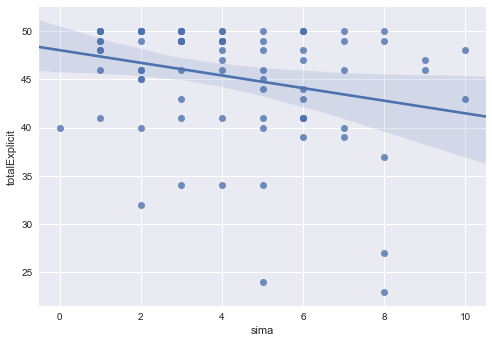

In [21]:
import seaborn
ax = seaborn.regplot(x=sim_data['sima'], y=sim_data['totalExplicit'])

## MDS analyses

In [22]:
cols1 = ['1_sim1_1', '2_sim1_1', '3_sim1_1', '4_sim1_1', '5_sim1_1', '6_sim1_1', '7_sim1_1', '8_sim1_1', '9_sim1_1', '10_sim1_1']
cols11 = ['1_sim11_1', '2_sim11_1', '3_sim11_1', '4_sim11_1', '5_sim11_1', '6_sim11_1', '7_sim11_1', '8_sim11_1', '9_sim11_1', '10_sim11_1']

cols2 = ['1_sim2_1', '2_sim2_1', '3_sim2_1', '4_sim2_1', '5_sim2_1', '6_sim2_1', '7_sim2_1', '8_sim2_1', '9_sim2_1', '10_sim2_1']
cols12 = ['1_sim12_1', '2_sim12_1', '3_sim12_1', '4_sim12_1', '5_sim12_1', '6_sim12_1', '7_sim12_1', '8_sim12_1', '9_sim12_1', '10_sim12_1']

cols3 = ['1_sim3_1', '2_sim3_1', '3_sim3_1', '4_sim3_1', '5_sim3_1', '6_sim3_1', '7_sim3_1', '8_sim3_1', '9_sim3_1', '10_sim3_1']
cols13 = ['1_sim13_1', '2_sim13_1', '3_sim13_1', '4_sim13_1', '5_sim13_1', '6_sim13_1', '7_sim13_1', '8_sim13_1', '9_sim13_1', '10_sim13_1']

cols4 = ['1_sim4_1', '2_sim4_1', '3_sim4_1', '4_sim4_1', '5_sim4_1', '6_sim4_1', '7_sim4_1', '8_sim4_1', '9_sim4_1', '10_sim4_1']
cols14 = ['1_sim14_1', '2_sim14_1', '3_sim14_1', '4_sim14_1', '5_sim14_1', '6_sim14_1', '7_sim14_1', '8_sim14_1', '9_sim14_1', '10_sim14_1']

cols5 = ['1_sim5_1', '2_sim5_1', '3_sim5_1', '4_sim5_1', '5_sim5_1']
cols15 = ['1_sim15_1', '2_sim15_1', '3_sim15_1', '4_sim15_1', '5_sim15_1', '6_sim15_1', '7_sim15_1', '8_sim15_1', '9_sim15_1', '10_sim15_1']

cols6 = ['1_sim6_1', '2_sim6_1', '3_sim6_1', '4_sim6_1', '5_sim6_1', '6_sim6_1', '7_sim6_1', '8_sim6_1', '9_sim6_1', '10_sim6_1']
cols16 = ['1_sim16_1', '2_sim16_1', '3_sim16_1', '4_sim16_1', '5_sim16_1', '6_sim16_1', '7_sim16_1', '8_sim16_1', '9_sim16_1', '10_sim16_1']

cols7 = ['1_sim7_1', '2_sim7_1', '3_sim7_1', '4_sim7_1', '5_sim7_1', '6_sim7_1', '7_sim7_1', '8_sim7_1', '9_sim7_1', '10_sim7_1']
cols17 = ['1_sim17_1', '2_sim17_1', '3_sim17_1', '4_sim17_1', '5_sim17_1', '6_sim17_1', '7_sim17_1', '8_sim17_1', '9_sim17_1', '10_sim17_1']

cols8 = ['1_sim8_1', '2_sim8_1', '3_sim8_1', '4_sim8_1', '5_sim8_1', '6_sim8_1', '7_sim8_1', '8_sim8_1', '9_sim8_1', '10_sim8_1']
cols18 = ['1_sim18_1', '2_sim18_1', '3_sim18_1', '4_sim18_1', '5_sim18_1', '6_sim18_1', '7_sim18_1', '8_sim18_1', '9_sim18_1', '10_sim18_1']

cols9 = ['1_sim9_1', '2_sim9_1', '3_sim9_1', '4_sim9_1', '5_sim9_1', '6_sim9_1', '7_sim9_1', '8_sim9_1', '9_sim9_1', '10_sim9_1']
cols19 = ['1_sim19_1', '2_sim19_1', '3_sim19_1', '4_sim19_1', '5_sim19_1', '6_sim19_1', '7_sim19_1', '8_sim19_1', '9_sim19_1', '10_sim19_1']

cols10 = ['1_sim10_1', '2_sim10_1', '3_sim10_1', '4_sim10_1', '5_sim10_1', '6_sim10_1', '7_sim10_1', '8_sim10_1', '9_sim10_1', '10_sim10_1']
cols20 = ['1_sim20_1', '2_sim20_1', '3_sim20_1', '4_sim20_1', '5_sim20_1']


cols = []
col_list = [cols1, cols2, cols3, cols4, cols5, cols6, cols7, cols8, cols9, cols10,
           cols11, cols12, cols13, cols14, cols15, cols16, cols17, cols18, cols19, cols20]
for item in col_list:
    cols.extend(item) # make into one big list!

for col in cols:
    sim_data[col] = sim_data[col].astype(int) # turn them all into integers!

In [23]:
list1 = [5, 14, 16, 9, 29, 8, 11, 20, 18, 21] # first measure
list2 = [7, 25, 12, 17, 28, 6, 13, 4, 27, 10] # second measure

## Steps:
* Averages for both measure across all participants
* Individually average parallel items across measures
* Make MDS plots for before & after for each participant

## AVERAGE PLOTS

In [24]:
# create empty matrix to fill in for the first measure
sim_mtx1 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i == j:
            sim_mtx1[i,j] = 100
#sim_mtx1

In [25]:
for i,col in zip(range(len(list1)),cols1):
    if i < 9:
        sim_mtx1[i,i+1] = sim_mtx1[i+1,i] = sim_data[col].mean()
    else:
        sim_mtx1[i-9,i] = sim_mtx1[i,i-9] = sim_data[col].mean()

for i,col in zip(range(len(list1)),cols2):
    if i < 8:
        sim_mtx1[i,i+2] = sim_mtx1[i+2,i] = sim_data[col].mean()
    else:
        sim_mtx1[i-8,i] = sim_mtx1[i,i-8] = sim_data[col].mean()

for i,col in zip(range(len(list1)),cols3):
    if i < 7:
        sim_mtx1[i,i+3] = sim_mtx1[i+3,i] = sim_data[col].mean()
    else:
        sim_mtx1[i-7,i] = sim_mtx1[i,i-7] = sim_data[col].mean()
    
for i,col in zip(range(len(list1)),cols4):
    if i < 6:
        sim_mtx1[i,i+4] = sim_mtx1[i+4,i] = sim_data[col].mean()
    else:
        sim_mtx1[i-6,i] = sim_mtx1[i,i-6] = sim_data[col].mean()

for i,col in zip(range(len(list1)),cols5):
    sim_mtx1[i,i+5] = sim_mtx1[i+5,i] = sim_data[col].mean()

sim_mtx1

array([[100.        ,  24.47619048,  22.46428571,  45.75      ,
         18.91666667,  42.92857143,  32.10714286,  45.19047619,
         22.44047619,  19.04761905],
       [ 24.47619048, 100.        ,  63.13095238,  27.58333333,
         28.82142857,  38.77380952,  43.41666667,  42.16666667,
         54.47619048,  44.69047619],
       [ 22.46428571,  63.13095238, 100.        ,  34.92857143,
         25.6547619 ,  56.64285714,  36.63095238,  53.75      ,
         63.21428571,  40.97619048],
       [ 45.75      ,  27.58333333,  34.92857143, 100.        ,
         40.58333333,  64.33333333,  53.01190476,  26.35714286,
         57.        ,  32.26190476],
       [ 18.91666667,  28.82142857,  25.6547619 ,  40.58333333,
        100.        ,  21.13095238,  24.8452381 ,  41.64285714,
         28.1547619 ,  42.69047619],
       [ 42.92857143,  38.77380952,  56.64285714,  64.33333333,
         21.13095238, 100.        ,  39.20238095,  35.83333333,
         57.86904762,  22.8452381 ],
       [ 3

In [26]:
# create empty matrix to fill in for the second measure
sim_mtx2 = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i == j:
            sim_mtx2[i,j] = 100
#sim_mtx2

In [27]:
for i,col in zip(range(len(list2)),cols16):
    if i < 9:
        sim_mtx2[i,i+1] = sim_mtx2[i+1,i] = sim_data[col].mean()
    else:
        sim_mtx2[i-9,i] = sim_mtx2[i,i-9] = sim_data[col].mean()

for i,col in zip(range(len(list2)),cols17):
    if i < 8:
        sim_mtx2[i,i+2] = sim_mtx2[i+2,i] = sim_data[col].mean()
    else:
        sim_mtx2[i-8,i] = sim_mtx2[i,i-8] = sim_data[col].mean()

for i,col in zip(range(len(list2)),cols18):
    if i < 7:
        sim_mtx2[i,i+3] = sim_mtx2[i+3,i] = sim_data[col].mean()
    else:
        sim_mtx2[i-7,i] = sim_mtx2[i,i-7] = sim_data[col].mean()
    
for i,col in zip(range(len(list2)),cols19):
    if i < 6:
        sim_mtx2[i,i+4] = sim_mtx2[i+4,i] = sim_data[col].mean()
    else:
        sim_mtx2[i-6,i] = sim_mtx2[i,i-6] = sim_data[col].mean()

for i,col in zip(range(len(list2)),cols20):
    sim_mtx2[i,i+5] = sim_mtx2[i+5,i] = sim_data[col].mean()

sim_mtx2

array([[100.        ,  19.92857143,  32.91666667,  50.98809524,
         40.01190476,  61.21428571,  35.22619048,  45.11904762,
         41.11904762,  37.20238095],
       [ 19.92857143, 100.        ,  26.04761905,  31.95238095,
         58.0952381 ,  20.04761905,  27.4047619 ,  21.33333333,
         60.46428571,  39.76190476],
       [ 32.91666667,  26.04761905, 100.        ,  39.58333333,
         38.83333333,  58.38095238,  62.63095238,  45.97619048,
         27.36904762,  63.10714286],
       [ 50.98809524,  31.95238095,  39.58333333, 100.        ,
         28.07142857,  22.75      ,  47.03571429,  21.8452381 ,
         49.03571429,  32.88095238],
       [ 40.01190476,  58.0952381 ,  38.83333333,  28.07142857,
        100.        ,  31.70238095,  24.08333333,  37.45238095,
         69.78571429,  32.69047619],
       [ 61.21428571,  20.04761905,  58.38095238,  22.75      ,
         31.70238095, 100.        ,  26.41666667,  62.6547619 ,
         21.30952381,  47.82142857],
       [ 3

In [28]:
scaled1 = sim_mtx1/100
scaled2 = sim_mtx2/100

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0.5,1,'MDS: measure #2 averaged')

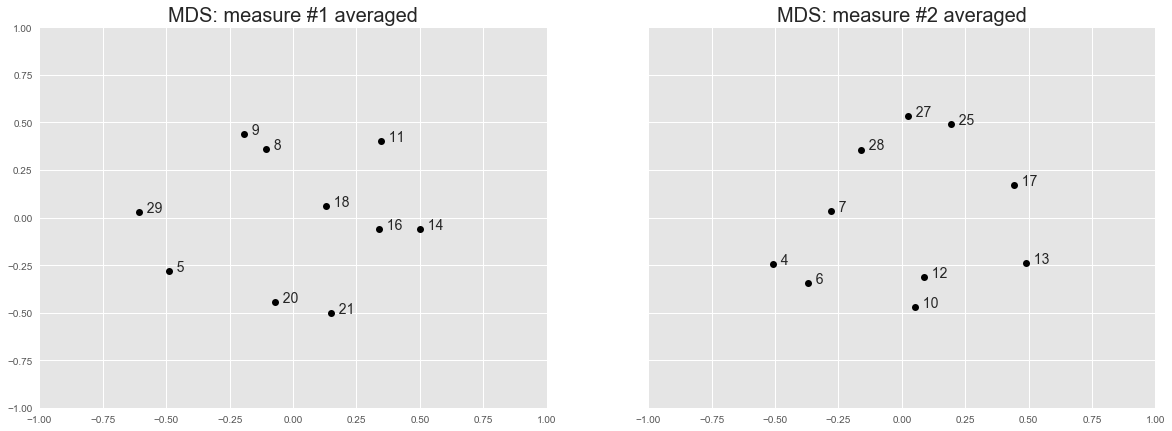

In [30]:
f, ((axis1, axis2)) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,7))

points1 = mds(1 - scaled1)
axis1.set_xlim(-1, 1)
axis1.set_ylim(-1, 1)
axis1.plot(points1[:, 0], points1[:, 1], 'ko')
for name, point in zip(list1, points1):
    axis1.text(point[0], point[1], "  {}".format(name), fontsize=14)
axis1.set_title("MDS: measure #1 averaged", fontsize=20)

points2 = mds(1 - scaled2)
axis2.set_xlim(-1, 1)
axis2.set_ylim(-1, 1)
axis2.plot(points2[:, 0], points2[:, 1], 'ko')
for name, point in zip(list2, points2):
    axis2.text(point[0], point[1], "  {}".format(name), fontsize=14)
axis2.set_title("MDS: measure #2 averaged", fontsize=20)

# f.savefig('Data/figs/extension/MDS_average.png')
# f.savefig('Data/figs/extension/MDS_average.eps', dpi=1000)

In [31]:
points1

array([[-0.49073391, -0.28323161],
       [ 0.49934221, -0.0617017 ],
       [ 0.33699993, -0.06037103],
       [-0.19183536,  0.438883  ],
       [-0.60614088,  0.03076158],
       [-0.10854728,  0.36145446],
       [ 0.3452524 ,  0.40162993],
       [-0.06958108, -0.4458024 ],
       [ 0.12933391,  0.06188265],
       [ 0.14795293, -0.50403809]])

## INDIVIDUAL pair plots

In [48]:
# create empty matrices to fill in for each measure --> person 1
sim_mtx1a = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i == j:
            sim_mtx1a[i,j] = 100
sim_mtx2a = np.zeros((10,10))
for i in range(10):
    for j in range(10):
        if i == j:
            sim_mtx2a[i,j] = 100


In [49]:
for i,col in zip(range(len(list1)),cols1):
    if i < 9:
        sim_mtx1a[i,i+1] = sim_mtx1a[i+1,i] = sim_data[col][2]
    else:
        sim_mtx1a[i-9,i] = sim_mtx1a[i,i-9] = sim_data[col][2]

for i,col in zip(range(len(list1)),cols2):
    if i < 8:
        sim_mtx1a[i,i+2] = sim_mtx1a[i+2,i] = sim_data[col][2]
    else:
        sim_mtx1a[i-8,i] = sim_mtx1a[i,i-8] = sim_data[col][2]

for i,col in zip(range(len(list1)),cols3):
    if i < 7:
        sim_mtx1a[i,i+3] = sim_mtx1a[i+3,i] = sim_data[col][2]
    else:
        sim_mtx1a[i-7,i] = sim_mtx1a[i,i-7] = sim_data[col][2]
    
for i,col in zip(range(len(list1)),cols4):
    if i < 6:
        sim_mtx1a[i,i+4] = sim_mtx1a[i+4,i] = sim_data[col][2]
    else:
        sim_mtx1a[i-6,i] = sim_mtx1a[i,i-6] = sim_data[col][2]

for i,col in zip(range(len(list1)),cols5):
    sim_mtx1a[i,i+5] = sim_mtx1a[i+5,i] = sim_data[col][2]

sim_mtx1a

array([[100.,  35.,   2.,  15.,  16.,  28.,  26.,  74.,  43.,  37.],
       [ 35., 100.,  75.,  22.,  15.,  48.,  29.,  41.,  46.,  88.],
       [  2.,  75., 100.,  43.,  15.,  75.,  22.,  24.,  46.,  21.],
       [ 15.,  22.,  43., 100.,  34.,  55.,  19.,  18.,  47.,  23.],
       [ 16.,  15.,  15.,  34., 100.,  29.,  37.,   5.,  26.,  17.],
       [ 28.,  48.,  75.,  55.,  29., 100.,  29.,  54.,  18.,  29.],
       [ 26.,  29.,  22.,  19.,  37.,  29., 100.,  28.,  51.,  14.],
       [ 74.,  41.,  24.,  18.,   5.,  54.,  28., 100.,  64.,  65.],
       [ 43.,  46.,  46.,  47.,  26.,  18.,  51.,  64., 100.,  48.],
       [ 37.,  88.,  21.,  23.,  17.,  29.,  14.,  65.,  48., 100.]])

In [50]:
for i,col in zip(range(len(list2)),cols16):
    if i < 9:
        sim_mtx2a[i,i+1] = sim_mtx2a[i+1,i] = sim_data[col][2]
    else:
        sim_mtx2a[i-9,i] = sim_mtx2a[i,i-9] = sim_data[col][2]

for i,col in zip(range(len(list2)),cols17):
    if i < 8:
        sim_mtx2a[i,i+2] = sim_mtx2a[i+2,i] = sim_data[col][2]
    else:
        sim_mtx2a[i-8,i] = sim_mtx2a[i,i-8] = sim_data[col][2]

for i,col in zip(range(len(list2)),cols18):
    if i < 7:
        sim_mtx2a[i,i+3] = sim_mtx2a[i+3,i] = sim_data[col][2]
    else:
        sim_mtx2a[i-7,i] = sim_mtx2a[i,i-7] = sim_data[col][2]
    
for i,col in zip(range(len(list2)),cols19):
    if i < 6:
        sim_mtx2a[i,i+4] = sim_mtx2a[i+4,i] = sim_data[col][2]
    else:
        sim_mtx2a[i-6,i] = sim_mtx2a[i,i-6] = sim_data[col][2]

for i,col in zip(range(len(list2)),cols20):
    sim_mtx2a[i,i+5] = sim_mtx2a[i+5,i] = sim_data[col][2]

sim_mtx2a

array([[100.,  14.,  26.,  39.,  83.,  62.,  16.,  11.,  16.,  10.],
       [ 14., 100.,  22.,  25.,  52.,   8.,  34.,  23.,  43.,  19.],
       [ 26.,  22., 100.,  19.,  32.,  74.,  52.,  82.,  20.,  71.],
       [ 39.,  25.,  19., 100.,  16.,  23.,  20.,  21.,  40.,  19.],
       [ 83.,  52.,  32.,  16., 100.,  21.,  20.,  91.,  53.,  31.],
       [ 62.,   8.,  74.,  23.,  21., 100.,  12.,  54.,  13.,  34.],
       [ 16.,  34.,  52.,  20.,  20.,  12., 100.,  23.,  20.,  23.],
       [ 11.,  23.,  82.,  21.,  91.,  54.,  23., 100.,  13.,  10.],
       [ 16.,  43.,  20.,  40.,  53.,  13.,  20.,  13., 100.,  13.],
       [ 10.,  19.,  71.,  19.,  31.,  34.,  23.,  10.,  13., 100.]])

In [51]:
scaled1a = sim_mtx1a/100
scaled2a = sim_mtx2a/100

Text(0.5,1,'MDS: measure #2 participant a')

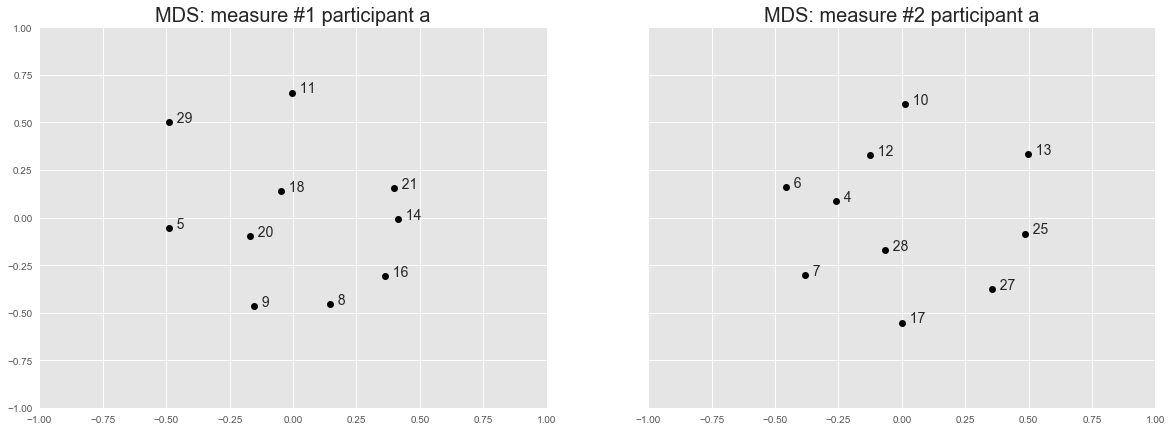

In [52]:
f, ((axis1, axis2)) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,7))

points1a = mds(1 - scaled1a)
axis1.set_xlim(-1, 1)
axis1.set_ylim(-1, 1)
axis1.plot(points1a[:, 0], points1a[:, 1], 'ko')
for name, point in zip(list1, points1a):
    axis1.text(point[0], point[1], "  {}".format(name), fontsize=14)
axis1.set_title("MDS: measure #1 participant a", fontsize=20)

points2a = mds(1 - scaled2a)
axis2.set_xlim(-1, 1)
axis2.set_ylim(-1, 1)
axis2.plot(points2a[:, 0], points2a[:, 1], 'ko')
for name, point in zip(list2, points2a):
    axis2.text(point[0], point[1], "  {}".format(name), fontsize=14)
axis2.set_title("MDS: measure #2 participant a", fontsize=20)


## Per person

In [56]:
# create empty matrices to fill in for each measure for each person

sims1 = []
sims2 = []
for i in range(84):
    sims1.append(np.zeros((10,10)))
    sims2.append(np.zeros((10,10)))

for mtx in sims1:
    for i in range(10):
        for j in range(10):
            if i == j:
                mtx[i,j] = 100

for mtx in sims2:
    for i in range(10):
        for j in range(10):
            if i == j:
                mtx[i,j] = 100


In [57]:
# need to loop through the empty matrices as well as the indices corresponding to people
for mtx,p in zip(sims1,range(2,12)): 
    for i,col in zip(range(len(list1)),cols1):
        if i < 9:
            mtx[i,i+1] = mtx[i+1,i] = sim_data[col][p]
        else:
            mtx[i-9,i] = mtx[i,i-9] = sim_data[col][p]

    for i,col in zip(range(len(list1)),cols2):
        if i < 8:
            mtx[i,i+2] = mtx[i+2,i] = sim_data[col][p]
        else:
            mtx[i-8,i] = mtx[i,i-8] = sim_data[col][p]

    for i,col in zip(range(len(list1)),cols3):
        if i < 7:
            mtx[i,i+3] = mtx[i+3,i] = sim_data[col][p]
        else:
            mtx[i-7,i] = mtx[i,i-7] = sim_data[col][p]

    for i,col in zip(range(len(list1)),cols4):
        if i < 6:
            mtx[i,i+4] = mtx[i+4,i] = sim_data[col][p]
        else:
            mtx[i-6,i] = mtx[i,i-6] = sim_data[col][p]

    for i,col in zip(range(len(list1)),cols5):
        mtx[i,i+5] = mtx[i+5,i] = sim_data[col][p]

sims1

KeyError: 4

In [58]:
for mtx,p in zip(sims2,range(2,12)): 
    for i,col in zip(range(len(list2)),cols16):
        if i < 9:
            mtx[i,i+1] = mtx[i+1,i] = sim_data[col][p]
        else:
            mtx[i-9,i] = mtx[i,i-9] = sim_data[col][p]

    for i,col in zip(range(len(list2)),cols17):
        if i < 8:
            mtx[i,i+2] = mtx[i+2,i] = sim_data[col][p]
        else:
            mtx[i-8,i] = mtx[i,i-8] = sim_data[col][p]

    for i,col in zip(range(len(list2)),cols18):
        if i < 7:
            mtx[i,i+3] = mtx[i+3,i] = sim_data[col][p]
        else:
            mtx[i-7,i] = mtx[i,i-7] = sim_data[col][p]

    for i,col in zip(range(len(list2)),cols19):
        if i < 6:
            mtx[i,i+4] = mtx[i+4,i] = sim_data[col][p]
        else:
            mtx[i-6,i] = mtx[i,i-6] = sim_data[col][p]

    for i,col in zip(range(len(list2)),cols20):
        mtx[i,i+5] = mtx[i+5,i] = sim_data[col][p]

sims2

KeyError: 4

In [76]:
# scale both sets of matrices
scaled1 = [mtx/100 for mtx in sims1]
scaled2 = [mtx/100 for mtx in sims2]

In [80]:
# apply mds on each scaled matrix
points1 = [mds(1-mtx) for mtx in scaled1]
points2 = [mds(1-mtx) for mtx in scaled2]

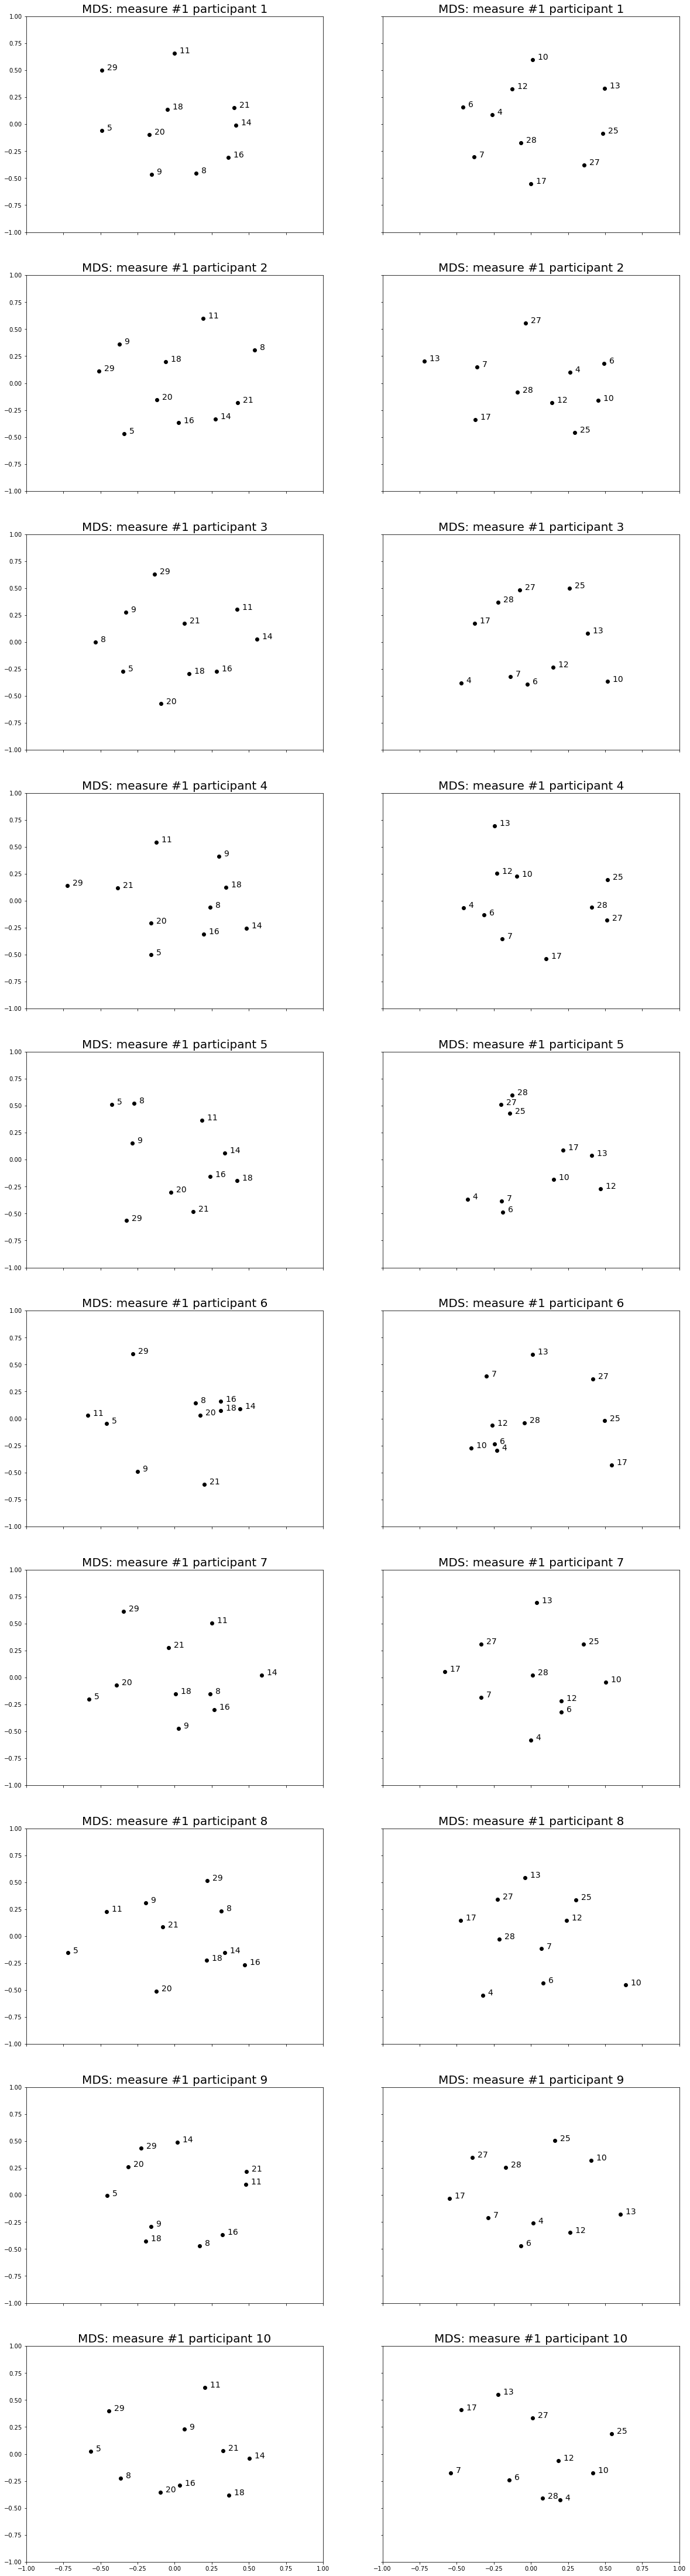

In [101]:
f, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12),(ax13, ax14),
   (ax15, ax16),(ax17, ax18),(ax19, ax20)) = plt.subplots(10, 2, sharex='col', sharey='row', figsize=(20,80))

axs_odd = [ax1, ax3, ax5, ax7, ax9, ax11, ax13, ax15, ax17, ax19]
axs_even = [ax2, ax4, ax6, ax8, ax10, ax12, ax14, ax16, ax18, ax20]

for ax,i in zip(axs_odd,range(len(list1))):
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.plot(points1[i][:, 0], points1[i][:, 1], 'ko')
    for name, point in zip(list1, points1[i]):
        ax.text(point[0], point[1], "  {}".format(name), fontsize=14)
    ax.set_title("MDS: measure #1 participant " + str(i+1), fontsize=20)

for ax,i in zip(axs_even,range(len(list2))):
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.plot(points2[i][:, 0], points2[i][:, 1], 'ko')
    for name, point in zip(list2, points2[i]):
        ax.text(point[0], point[1], "  {}".format(name), fontsize=14)
    ax.set_title("MDS: measure #1 participant "+ str(i+1), fontsize=20)

